In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df['age'].replace(np.nan,df['age'].astype('float').mean(),inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


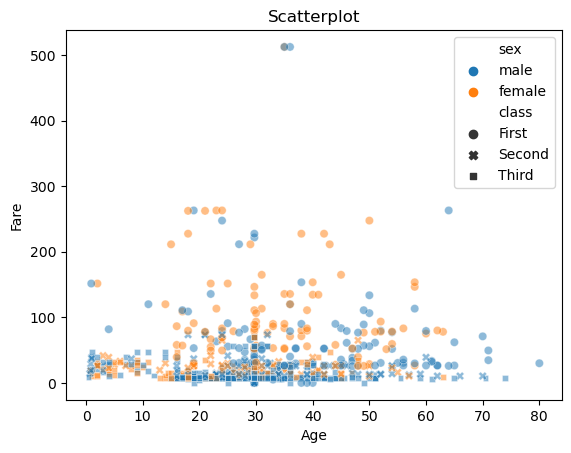

In [8]:
sns.scatterplot(x='age',y='fare',color='red',hue='sex',style='class',alpha=0.5,data=df)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatterplot')
plt.legend()
plt.show()

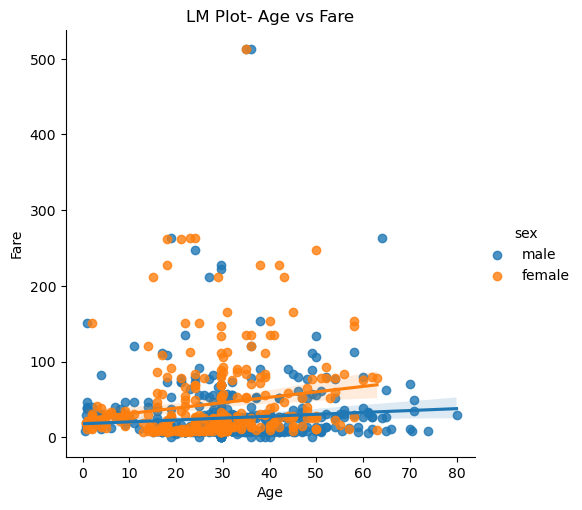

In [13]:
sns.lmplot(x='age',y='fare',hue='sex',data=df)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('LM Plot- Age vs Fare')
plt.show()

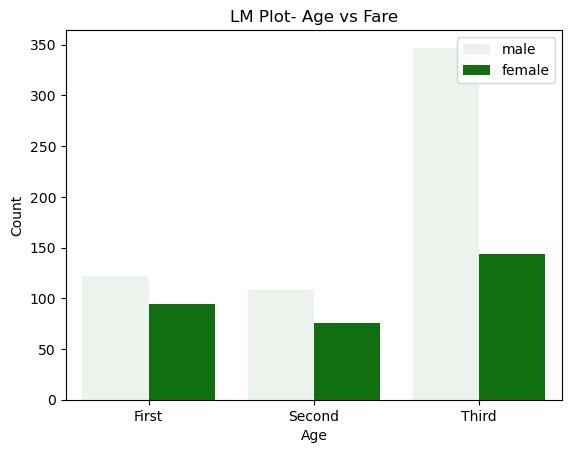

In [24]:
sns.countplot(x='class',hue='sex',color='green',data=df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('LM Plot- Age vs Fare')
plt.legend(loc='upper right')
plt.show()

/tmp/ipykernel_5220/1432717125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'],color='blue')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


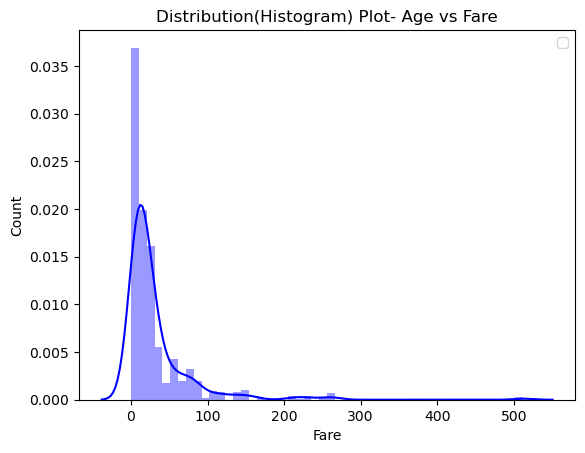

In [34]:
sns.distplot(df['fare'],color='blue')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution(Histogram) Plot- Age vs Fare')
plt.legend(loc='upper right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


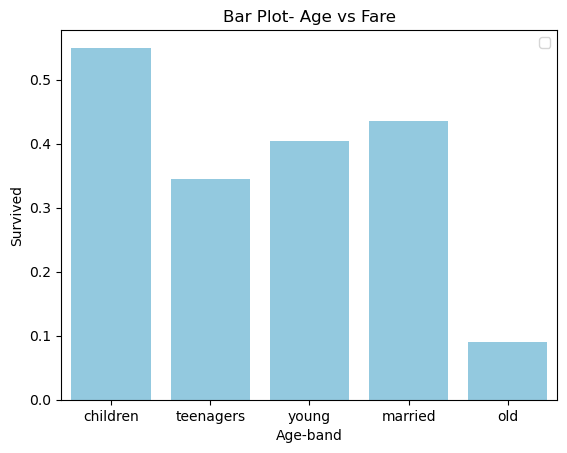

In [31]:
df['age-band']=pd.cut(df['age'],bins=5,labels=['children','teenagers','young','married','old'])
age_survival=df.groupby('age-band')['survived'].mean().reset_index()

sns.barplot(x='age-band',y='survived',data=age_survival,color='skyblue')
plt.xlabel('Age-band')
plt.ylabel('Survived')
plt.title('Bar Plot- Age vs Fare')
plt.legend(loc='upper right')
plt.show()

In [32]:
age_survival

,age-band,survived
0,children,0.550000
1,teenagers,0.344168
2,young,0.404255
3,married,0.434783
4,old,0.090909
